# Studio del rapporto E/charge al variare dell'energia

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit import Model
import os

In [2]:
os.makedirs("/tmp/linearità/", exist_ok=True)

In [89]:
nominal = {"cs":np.array([662]), "na":np.array([551,1275]), "co":np.array([1173,1332]), "ba":np.array([302,356])}

cs = pd.read_table('CalibK_Cs.dat', header=None, sep=" ", comment='#')
na = pd.read_table('CalibK_Na.dat', header=None, sep=" ", comment='#')
co = pd.read_table('CalibK_Co.dat', header=None, sep=" ", comment='#')
ba =  pd.read_table('CalibK_Ba.dat', header=None, sep=" ", comment='#', usecols=[2,3])

print(cs.loc(0)[:].min())

0    0.596082
dtype: float64


0.6763861333333334


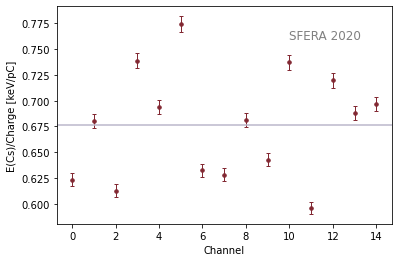

In [21]:
channels=range(0,15)
ks=np.array([cs.loc(0)[ch][0] for ch in range(0,15)])

print(ks.mean())

fig, ax = plt.subplots(1,1)

ax.text(10, 0.76, "SFERA 2020", fontsize=12, color="gray")

ax.set_xlabel("Channel")
ax.set_ylabel("E(Cs)/Charge [keV/pC]")
ax.axhline(y=ks.mean(), color=[187/255, 183/255, 203/255])

plt.errorbar(channels, ks, yerr=0.01*ks, fmt=".", color=[130/255, 40/255, 50/255], markersize=7, elinewidth=1, capsize=2)

plt.savefig("/tmp/linearità/calib_cesio.pdf", format="pdf")

In [5]:
def func(x, a, b, c):
    return a + x*b #+ x*x*c #+ x*x*x*d

fitfunc=Model(func)
params = fitfunc.make_params(a=0, b=1, c=0, d=0)

In [6]:
x=[]
for source in ["cs", "na", "co", "ba"]:
    for value in nominal[source]:
        x.append(value)
#x=np.sort(x)

chisqr=49.663756610916394


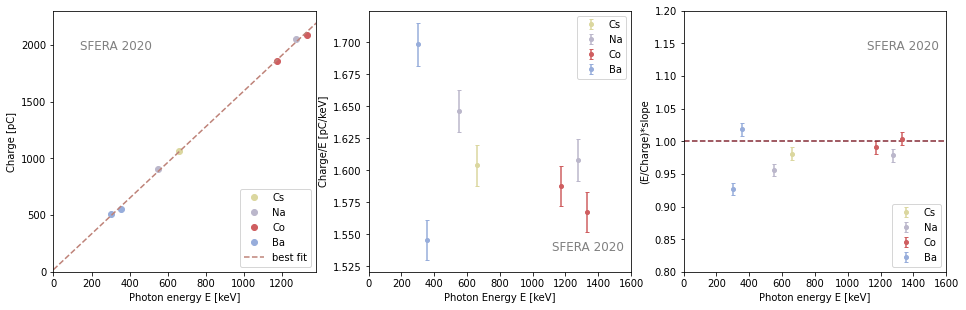

chisqr=41.04162286038603


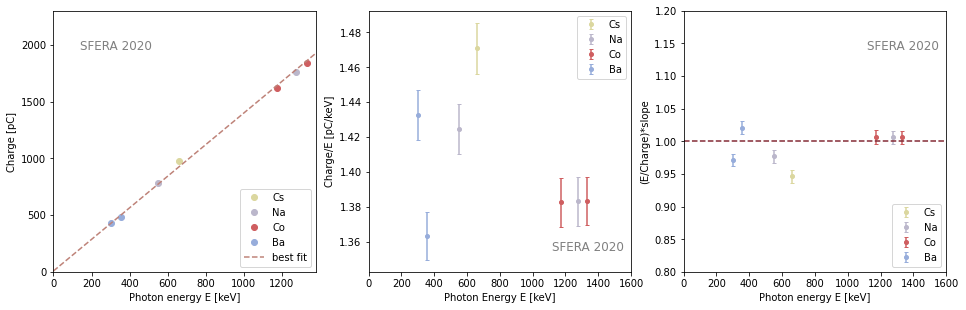

chisqr=39.39061116341765


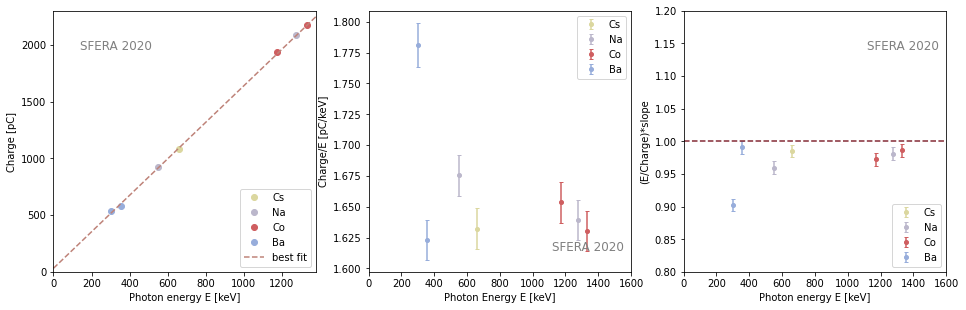

chisqr=58889.31276481619


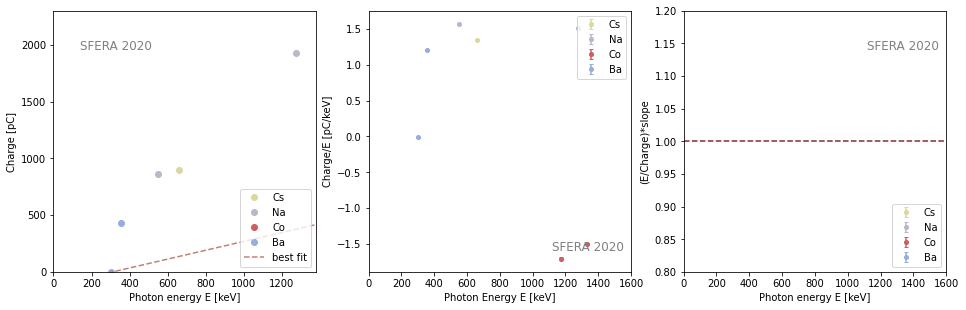

chisqr=23.297100011974706


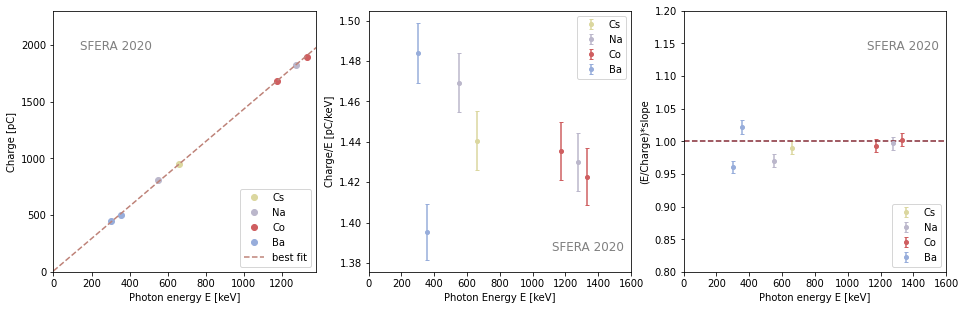

chisqr=34.91563396959325


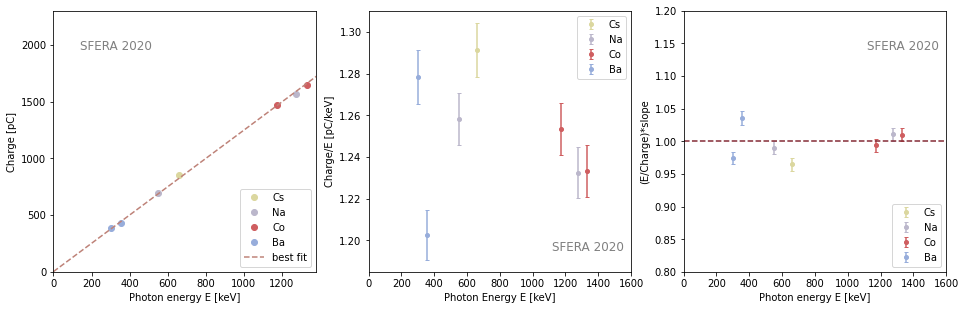

chisqr=12.910533454227952


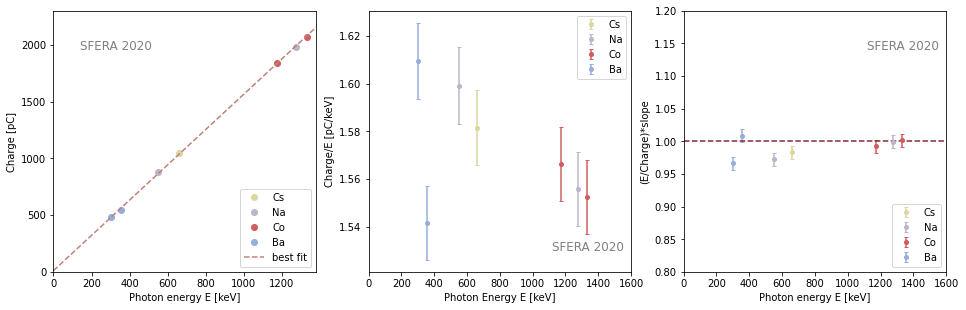

chisqr=14.532704041868332


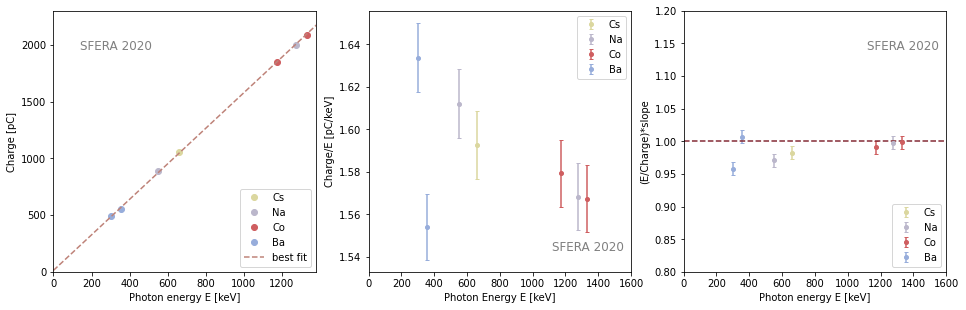

chisqr=23.859409688964938


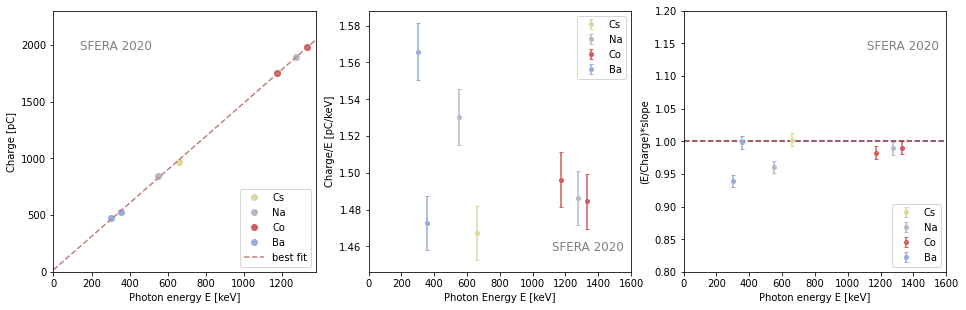

chisqr=15.029882490384399


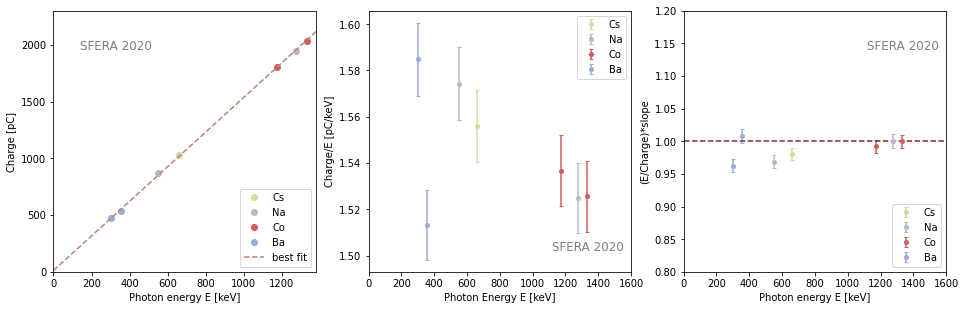

chisqr=138.96390423713677


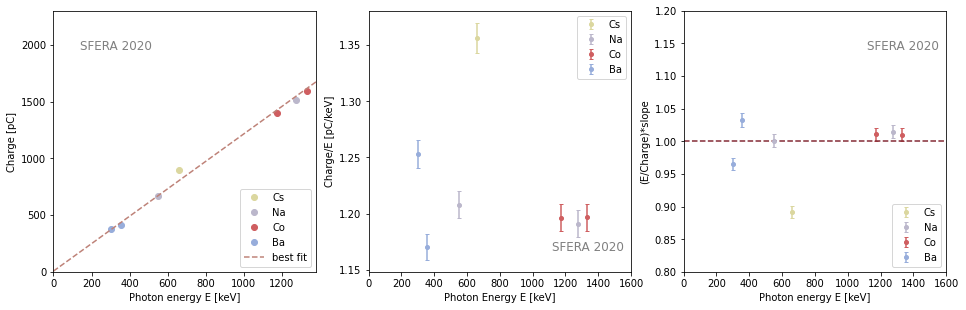

chisqr=28.8191042965744


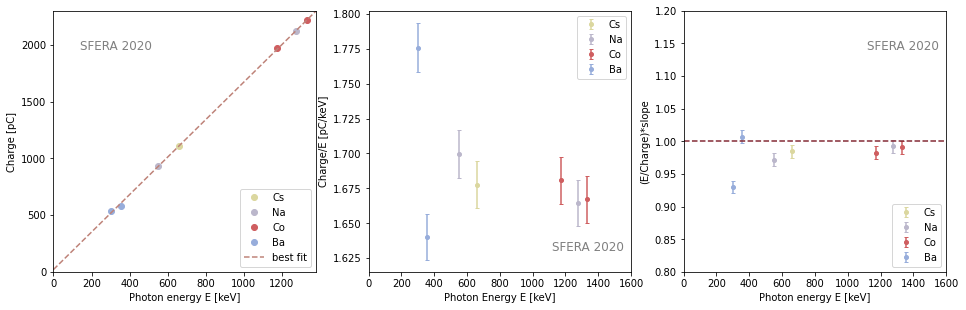

chisqr=16.82035710957775


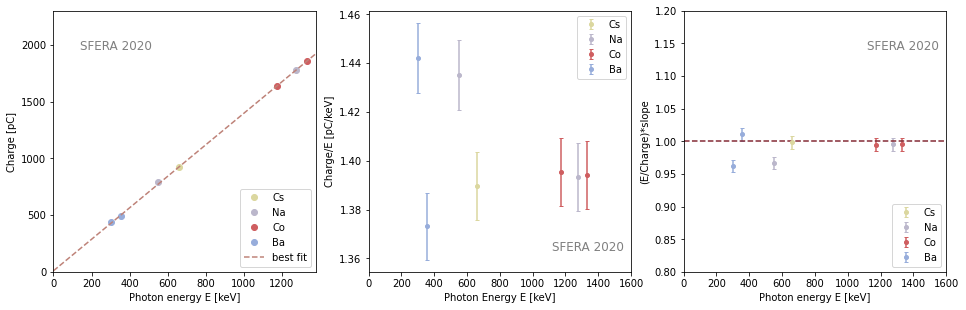

chisqr=12.029443907664632


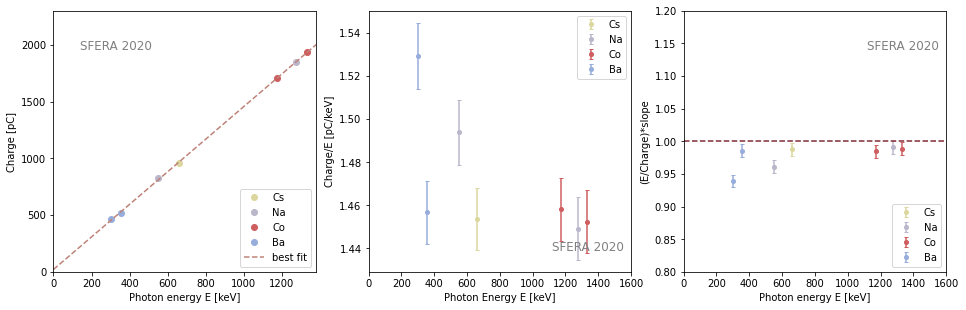

chisqr=22.866193807836748


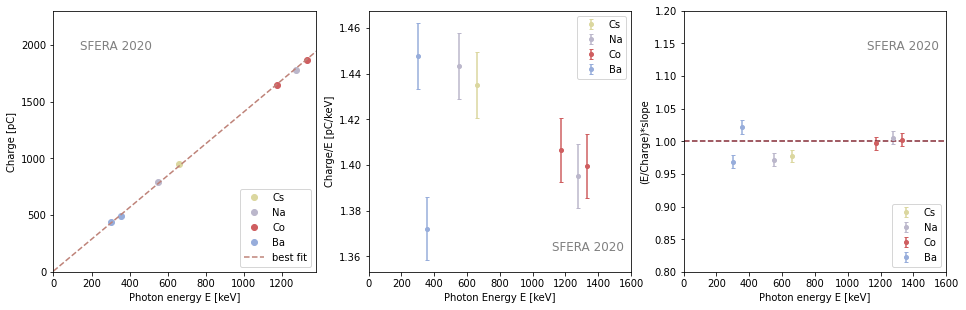

Plots saved in /tmp/linearità/ . Fit results saved in /tmp/linerità/results.log


In [101]:
output = open("/tmp/linearità/results.log", "w")
output.write("# f = a + b*x + c*x^2\n#ch\t\ta\t\tb\t\tc\t\tchi2\n")

for ch in range(0,15):
    
    y=np.array([np.array(nominal['cs'][0]/cs.loc[ch])[0], np.array(nominal['na'][0]/na.loc[ch])[0], np.array(nominal['na'][1]/na.loc[ch])[1], np.array(nominal['co'][0]/co.loc[ch])[0], np.array(nominal['co'][1]/co.loc[ch])[1], np.array(nominal['ba'][0]/ba.loc[ch])[0], np.array(nominal['ba'][1]/ba.loc[ch])[1]])
    
    results = fitfunc.fit(y, params, x=x, weights=1/(y*0.01))
    
    output.write(str(ch)+"\t"+str(results.best_values["a"])+"\t"+str(results.best_values["b"])+"\t"+str(results.best_values["c"])+"\t"+str(results.chisqr)+"\n")
    
    fig, ax = plt.subplots(1,3, figsize=[16, 4.8])
    
    ax[0].set_xlim(0,1380)
    ax[0].set_ylim(0,2300)
    
    ax[0].text(0.1, 0.85, "SFERA 2020", fontsize=12, color="gray", transform=ax[0].transAxes)
    
    ax[0].set_xlabel('Photon energy E [keV]')
    ax[0].set_ylabel('Charge [pC]')

    ax[0].plot(nominal['cs'], nominal['cs']/np.array(cs.loc[ch]), ".", markersize=12, color=[219/255, 215/255, 159/255], label='Cs')
    ax[0].plot(nominal['na'], nominal['na']/np.array(na.loc[ch]), ".", markersize=12, color=[187/255, 183/255, 203/255], label='Na')
    ax[0].plot(nominal['co'], nominal['co']/np.array(co.loc[ch]), ".", markersize=12, color=[0.812,0.369,0.377], label='Co')
    ax[0].plot(nominal['ba'], nominal['ba']/np.array(ba.loc[ch]), ".", markersize=12, color=[151/255,173/255,219/255], label='Ba')
    
    tmp=np.linspace(0,1400)
    
    ax[0].plot(tmp, func(tmp, results.best_values["a"], results.best_values["b"], results.best_values["c"]), "--", label="best fit", color=[190/255, 130/255, 120/255] )
    
    legend0 = ax[0].legend(loc='lower right')
    
    ax[1].set_xlim(0,1600)
    
    ax[1].text(0.7, 0.08, "SFERA 2020", fontsize=12, color="gray", transform=ax[1].transAxes)
    
    ax[1].set_xlabel('Photon Energy E [keV]')
    ax[1].set_ylabel('Charge/E [pC/keV]')
    
    ax[1].errorbar(nominal['cs'], 1./np.array(cs.loc[ch]), yerr=0.01/np.array(cs.loc[ch]), fmt=".", color=[219/255, 215/255, 159/255], markersize=8, capsize=2, label='Cs')
    ax[1].errorbar(nominal['na'], 1./np.array(na.loc[ch]), yerr=0.01/np.array(na.loc[ch]), fmt=".", color=[187/255, 183/255, 203/255], markersize=8, capsize=2, label='Na')
    ax[1].errorbar(nominal['co'], 1./np.array(co.loc[ch]), yerr=0.01/np.array(co.loc[ch]), fmt=".", color=[0.812,0.369,0.377], markersize=8, capsize=2, label='Co')
    ax[1].errorbar(nominal['ba'], 1./np.array(ba.loc[ch]), yerr=0.01/np.array(ba.loc[ch]),fmt=".", color=[151/255,173/255,219/255], markersize=8, capsize=2, label='Ba')
  
    legend1 = ax[1].legend(loc='upper right')
    
    ax[2].set_xlim(0,1600)
    ax[2].set_ylim(0.8,1.2)
    
    ax[2].text(0.7, 0.85, "SFERA 2020", fontsize=12, color="gray", transform=ax[2].transAxes)
    
    ax[2].set_xlabel('Photon energy E [keV]')
    ax[2].set_ylabel('(E/Charge)*slope')
    
    ax[2].errorbar(nominal['cs'], np.array(cs.loc[ch])*results.best_values["b"], yerr=0.01*np.array(cs.loc[ch])*results.best_values["b"], fmt=".", color=[219/255, 215/255, 159/255], markersize=8, capsize=2, label='Cs')
    ax[2].errorbar(nominal['na'], np.array(na.loc[ch])*results.best_values["b"], yerr=0.01*np.array(na.loc[ch])*results.best_values["b"], fmt=".", color=[187/255, 183/255, 203/255], markersize=8, capsize=2, label='Na')
    ax[2].errorbar(nominal['co'], np.array(co.loc[ch])*results.best_values["b"], yerr=0.01*np.array(co.loc[ch])*results.best_values["b"], fmt=".", color=[0.812,0.369,0.377], markersize=8, capsize=2, label='Co')
    ax[2].errorbar(nominal['ba'], np.array(ba.loc[ch])*results.best_values["b"], yerr=0.01*np.array(ba.loc[ch])*results.best_values["b"], fmt=".", color=[151/255,173/255,219/255], markersize=8, capsize=2, label='Ba')
    
    ax[2].axhline(y=1.00, color=[130/255, 40/255, 50/255], linestyle="dashed")
    
    legend2 = ax[2].legend(loc='lower right')
    
    plt.savefig("/tmp/linearità/ch"+str(ch)+".pdf", format="pdf")
    
    print("chisqr="+str(results.chisqr))
        
    plt.show()
    
print("Plots saved in /tmp/linearità/ . Fit results saved in /tmp/linerità/results.log")
output.close()